In [4]:
import FSP as fsp
import numpy as np
import pandas as pd
import timeit
import os
import matplotlib.pyplot as plt

# Tests

## 1. Branch and Bound

In [ ]:
# jobs = 10, machines : 10, Cmax = 1097, sigma = [ 3 1 2 8 4 7 9 10 6 5 ]
data = np.array([
    [50, 23, 35,  8, 41, 71, 44, 79, 85, 22],
    [37, 75, 94, 76, 17, 28, 99, 36, 14, 96],
    [25, 80, 36, 37,  1, 31, 16, 56, 53, 71],
    [86, 15, 17, 60, 46, 50, 20, 38, 76,  8],
    [51, 22, 34, 14, 11, 53, 40, 35,  9, 15],
    [21, 97, 48, 61, 77, 67, 14,  6, 95,  7],
    [68, 72, 20, 67,  1,  2, 48, 85, 89, 62],
    [29, 81, 91, 25, 60, 76, 44, 76, 28, 95],
    [52,  1, 29, 13,  6, 45, 64, 41, 32, 46],
    [14, 91, 92, 98, 99, 56, 79, 66, 25, 79]
]).T

flowshop = fsp.FlowShop(data)

temps_debut = timeit.default_timer()
sigma, cmax = flowshop.branchBound()
temps_fin = timeit.default_timer() - temps_debut

print("Jobs : ", flowshop.N, " - Machines : ", flowshop.M)
print("Best permutation : ", sigma.astype(int))
print("Cmax : ", int(cmax))
print("Time : ", temps_fin)

In [ ]:
# instance 01:
# jobs = 20, machines : 5
data =np.loadtxt('./Instances_Taillard/20jobs_5machines_1.txt')

flowshop = fsp.FlowShop(data)

temps_debut = timeit.default_timer()
sigma, cmax = flowshop.branchBound()
temps_fin = timeit.default_timer() - temps_debut

print("Jobs : ", flowshop.N, " - Machines : ", flowshop.M)
print("Best permutation : ", sigma.astype(int))
print("Cmax : ", int(cmax))
print("Time : ", temps_fin)

In [ ]:
#instance 2:celle qui a fonctionné
# jobs = 20, machines : 5
data =np.loadtxt('./Instances_Taillard/20jobs_5machines_2.txt')

flowshop = fsp.FlowShop(data)

temps_debut = timeit.default_timer()
sigma, cmax = flowshop.branchBound()
temps_fin = timeit.default_timer() - temps_debut

print("Jobs : ", flowshop.N, " - Machines : ", flowshop.M)
print("Best permutation : ", sigma.astype(int))
print("Cmax : ", int(cmax))
print("Time : ", temps_fin)

## 2. Les heuristiques

In [2]:
cds_cmax = []
neh_cmax = []
palmer_cmax = []
machines=[]
jobs=[]
Instances=[]


neh_temps = []

In [3]:
#on parcours les fichiers contenant les instances
files=os.listdir("./Instances_Taillard")
i=0
for filename in files:
    
    data=np.loadtxt("./Instances_Taillard/"+filename)
    Instances.append((i%2)+1)
    i+=1
    print(filename)
    flowshop = fsp.FlowShop(data)
    machines.append(flowshop.M)
    jobs.append(flowshop.N)
    
    #CDS
    temps_debut = timeit.default_timer()
    sigma, cmax = flowshop.CDS()
    cds_cmax.append(int(cmax))
    
    #Palmer
    temps_debut = timeit.default_timer()
    sigma, cmax = flowshop.palmer_heuristic()
    temps_fin = timeit.default_timer() - temps_debut
    palmer_cmax.append(int(cmax))
    
    #NEH
    temps_debut = timeit.default_timer()
    sigma, cmax = flowshop.NEH()
    temps_fin = timeit.default_timer() - temps_debut
    neh_cmax.append(int(cmax))
    neh_temps.append(temps_fin)

020jobs_05machines_1.txt
020jobs_05machines_2.txt
020jobs_10machines_1.txt
020jobs_10machines_2.txt
020jobs_20machines_1.txt
020jobs_20machines_2.txt
050jobs_05machines_1.txt
050jobs_05machines_2.txt
050jobs_10machines_1.txt
050jobs_10machines_2.txt
050jobs_20machines_1.txt
050jobs_20machines_2.txt
100jobs_05machines_1.txt
100jobs_05machines_2.txt
100jobs_10machines_1.txt
100jobs_10machines_2.txt
100jobs_20machines_1.txt
100jobs_20machines_2.txt
200jobs_10machines_1.txt
200jobs_10machines_2.txt
200jobs_20machines_1.txt
200jobs_20machines_2.txt
500jobs_20machines_1.txt
500jobs_20machines_2.txt


In [4]:
pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Best Known" : [1278, 1359, 1582,1659,2297,2099,2724,2834,2991,2867,3771,3668,5493,5268,5770,5349,6106,
                   6183,10862,10480,11152,11143,26040,26040],
    "Palmer" : palmer_cmax,
    "CDS" : cds_cmax,
    "NEH" : neh_cmax
})


,jobs,machines,Instance,Best Known,Palmer,CDS,NEH
0,20,5,1,1278,1384,1390,1286
1,20,5,2,1359,1439,1424,1365
2,20,10,1,1582,1790,1757,1680
3,20,10,2,1659,1948,1854,1729
4,20,20,1,2297,2818,2559,2410
5,20,20,2,2099,2331,2285,2150
6,50,5,1,2724,2774,2883,2733
7,50,5,2,2834,3014,3032,2843
8,50,10,1,2991,3453,3382,3135
9,50,10,2,2867,3313,3263,3032


## 2. Paramétrage et variantes

### 1. CDS

In [5]:
cds_cmax = []
cds2_cmax = []
cds3_cmax = []
machines=[]
jobs=[]
Instances=[]

In [7]:
#on parcours les fichiers contenant les instances
files=os.listdir("./Instances_Taillard")
i=0
for filename in files:
    
    data=np.loadtxt("./Instances_Taillard/"+filename)
    Instances.append((i%2)+1)
    i+=1
    print(filename)
    flowshop = fsp.FlowShop(data)
    machines.append(flowshop.M)
    jobs.append(flowshop.N)
    
    #CDS | nbSeq = M-1
    temps_debut = timeit.default_timer()
    sigma, cmax = flowshop.CDS()
    cds_cmax.append(int(cmax))
    
    #CDS | nbSeq = (M-1)/2
    temps_debut = timeit.default_timer()
    sigma, cmax = flowshop.CDS(round((flowshop.M-1)/2))
    temps_fin = timeit.default_timer() - temps_debut
    cds2_cmax.append(int(cmax))
    
    #CDS | nbSeq = (M-1)/4
    temps_debut = timeit.default_timer()
    sigma, cmax = flowshop.CDS(round((flowshop.M-1)/4))
    temps_fin = timeit.default_timer() - temps_debut
    cds3_cmax.append(int(cmax))


020jobs_05machines_1.txt
020jobs_05machines_2.txt
020jobs_10machines_1.txt
020jobs_10machines_2.txt
020jobs_20machines_1.txt
020jobs_20machines_2.txt
050jobs_05machines_1.txt
050jobs_05machines_2.txt
050jobs_10machines_1.txt
050jobs_10machines_2.txt
050jobs_20machines_1.txt
050jobs_20machines_2.txt
100jobs_05machines_1.txt
100jobs_05machines_2.txt
100jobs_10machines_1.txt
100jobs_10machines_2.txt
100jobs_20machines_1.txt
100jobs_20machines_2.txt
200jobs_10machines_1.txt
200jobs_10machines_2.txt
200jobs_20machines_1.txt
200jobs_20machines_2.txt
500jobs_20machines_1.txt
500jobs_20machines_2.txt


In [8]:
print("CDS - Variation du paramètre : nbSeq")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Best Known" : [1278, 1359, 1582,1659,2297,2099,2724,2834,2991,2867,3771,3668,5493,5268,5770,5349,6106,
                   6183,10862,10480,11152,11143,26040,26040],
    "nbSeq = M-1" : cds_cmax,
    "nbSeq = (M-1)/2" : cds2_cmax,
    "nbSeq = (M-1)/4" : cds3_cmax
})


CDS - Variation du paramètre : nbSeq


,jobs,machines,Instance,Best Known,nbSeq = M-1,nbSeq = (M-1)/2,nbSeq = (M-1)/4
0,20,5,1,1278,1390,1390,1390
1,20,5,2,1359,1424,1432,1432
2,20,10,1,1582,1757,1791,1791
3,20,10,2,1659,1854,1854,1854
4,20,20,1,2297,2559,2559,2559
5,20,20,2,2099,2285,2285,2353
6,50,5,1,2724,2883,2926,2926
7,50,5,2,2834,3032,3032,3032
8,50,10,1,2991,3382,3382,3645
9,50,10,2,2867,3263,3263,3335


### 2. NEH

### 2.1 Paramétrages

In [7]:
neh_order_cmax = []
neh_pas_10_cmax = []
neh_pas_20_cmax = []
neh_last_cmax = []
neh_random_cmax = []

neh_order_temps = []
neh_pas_10_temps = []
neh_pas_20_temps = []
neh_last_temps = []
neh_random_temps = []

In [8]:
#on parcours les fichiers contenant les instances
files=os.listdir("./Instances_Taillard")
i=0
for filename in files:
    
    data=np.loadtxt("./Instances_Taillard/"+filename)
    print(filename)
    flowshop = fsp.FlowShop(data)
    
    #NEH order = False
    temps_debut = timeit.default_timer()
    sigma, cmax = flowshop.NEH(order = False)
    temps_fin = timeit.default_timer() - temps_debut
    neh_order_cmax.append(int(cmax))
    neh_order_temps.append(temps_fin)
    
    #NEH pas = 10
    temps_debut = timeit.default_timer()
    sigma, cmax = flowshop.NEH(pas = 10)
    temps_fin = timeit.default_timer() - temps_debut
    neh_pas_10_cmax.append(int(cmax))
    neh_pas_10_temps.append(temps_fin)
    
    #NEH pas = 20
    temps_debut = timeit.default_timer()
    sigma, cmax = flowshop.NEH(pas = 20)
    temps_fin = timeit.default_timer() - temps_debut
    neh_pas_20_cmax.append(int(cmax))
    neh_pas_20_temps.append(temps_fin)
    
    #NEH tie = Last
    temps_debut = timeit.default_timer()
    sigma, cmax = flowshop.NEH(tie = "Last")
    temps_fin = timeit.default_timer() - temps_debut
    neh_last_cmax.append(int(cmax))
    neh_last_temps.append(temps_fin)
    
    #NEH tie = Random
    temps_debut = timeit.default_timer()
    sigma, cmax = flowshop.NEH(tie = "Random")
    temps_fin = timeit.default_timer() - temps_debut
    neh_random_cmax.append(int(cmax))
    neh_random_temps.append(temps_fin)

020jobs_05machines_1.txt
020jobs_05machines_2.txt
020jobs_10machines_1.txt
020jobs_10machines_2.txt
020jobs_20machines_1.txt
020jobs_20machines_2.txt
050jobs_05machines_1.txt
050jobs_05machines_2.txt
050jobs_10machines_1.txt
050jobs_10machines_2.txt
050jobs_20machines_1.txt
050jobs_20machines_2.txt
100jobs_05machines_1.txt
100jobs_05machines_2.txt
100jobs_10machines_1.txt
100jobs_10machines_2.txt
100jobs_20machines_1.txt
100jobs_20machines_2.txt
200jobs_10machines_1.txt
200jobs_10machines_2.txt
200jobs_20machines_1.txt
200jobs_20machines_2.txt
500jobs_20machines_1.txt
500jobs_20machines_2.txt


#### 2.1.1 CMAX

In [16]:
print("NEH CMAX - Variation du paramètre : order")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Best Known" : [1278, 1359, 1582,1659,2297,2099,2724,2834,2991,2867,3771,3668,5493,5268,5770,5349,6106,
                   6183,10862,10480,11152,11143,26040,26040],
    "Order = True" : neh_cmax,
    "Order = False" : neh_order_cmax
})

NEH - Variation du paramètre : order


,jobs,machines,Instance,Best Known,Order = True,Order = False
0,20,5,1,1278,1286,1334
1,20,5,2,1359,1365,1377
2,20,10,1,1582,1680,1675
3,20,10,2,1659,1729,1797
4,20,20,1,2297,2410,2456
5,20,20,2,2099,2150,2197
6,50,5,1,2724,2733,2745
7,50,5,2,2834,2843,2943
8,50,10,1,2991,3135,3249
9,50,10,2,2867,3032,3145


In [17]:
print("NEH CMAX - Variation du paramètre : tie")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Best Known" : [1278, 1359, 1582,1659,2297,2099,2724,2834,2991,2867,3771,3668,5493,5268,5770,5349,6106,
                   6183,10862,10480,11152,11143,26040,26040],
    "Tie = First" : neh_cmax,
    "tie = Last" : neh_last_cmax,
    "tie = Random" : neh_random_cmax
})

NEH - Variation du paramètre : tie


,jobs,machines,Instance,Best Known,Tie = First,tie = Last,tie = Random
0,20,5,1,1278,1286,1299,1298
1,20,5,2,1359,1365,1365,1377
2,20,10,1,1582,1680,1681,1675
3,20,10,2,1659,1729,1766,1747
4,20,20,1,2297,2410,2443,2443
5,20,20,2,2099,2150,2134,2150
6,50,5,1,2724,2733,2729,2730
7,50,5,2,2834,2843,2882,2848
8,50,10,1,2991,3135,3175,3175
9,50,10,2,2867,3032,3073,3041


In [20]:
print("NEH CMAX - Variation du paramètre : pas")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Pas = 1" : neh_cmax,
    "Pas = 10" : neh_pas_10_cmax,
    "Pas = 20" : neh_pas_20_cmax
})

NEH CMAX - Variation du paramètre : pas


,jobs,machines,Instance,Pas = 1,Pas = 10,Pas = 20
0,20,5,1,1286,1437,1472
1,20,5,2,1365,1476,1517
2,20,10,1,1680,1843,2026
3,20,10,2,1729,1983,2214
4,20,20,1,2410,2599,2937
5,20,20,2,2150,2536,2785
6,50,5,1,2733,2814,2945
7,50,5,2,2843,2990,3042
8,50,10,1,3135,3354,3325
9,50,10,2,3032,3157,3265


### 2.1.2 Temps

In [23]:
print("NEH Temps - Variation du paramètre : order")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Order = True" : neh_temps,
    "Order = False" : neh_order_temps
})

NEH Temps - Variation du paramètre : order


,jobs,machines,Instance,Order = True,Order = False
0,20,5,1,0.048758,0.085476
1,20,5,2,0.023793,0.026985
2,20,10,1,0.047692,0.051551
3,20,10,2,0.045743,0.046960
4,20,20,1,0.096272,0.100501
5,20,20,2,0.096190,0.096124
6,50,5,1,0.336611,0.340077
7,50,5,2,0.348529,0.337255
8,50,10,1,0.668571,0.718749
9,50,10,2,0.664003,0.728352


In [22]:
print("NEH Temps - Variation du paramètre : tie")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Tie = First" : neh_temps,
    "tie = Last" : neh_last_temps,
    "tie = Random" : neh_random_temps
})

NEH Temps - Variation du paramètre : tie


,jobs,machines,Instance,Tie = First,tie = Last,tie = Random
0,20,5,1,0.048758,0.024747,0.024426
1,20,5,2,0.023793,0.021546,0.024804
2,20,10,1,0.047692,0.045980,0.051967
3,20,10,2,0.045743,0.045230,0.048313
4,20,20,1,0.096272,0.098725,0.097881
5,20,20,2,0.096190,0.103412,0.120610
6,50,5,1,0.336611,0.354901,0.346243
7,50,5,2,0.348529,0.361571,0.347909
8,50,10,1,0.668571,0.697213,0.720990
9,50,10,2,0.664003,0.724338,0.690775


In [18]:
print("NEH temps - Variation du paramètre : pas")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Pas = 1" : neh_temps,
    "Pas = 10" : neh_pas_10_temps,
    "Pas = 20" : neh_pas_20_temps
})

NEH - Variation du paramètre : pas


,jobs,machines,Instance,Pas = 1,Pas = 10,Pas = 20
0,20,5,1,0.048758,0.004335,0.002236
1,20,5,2,0.023793,0.003201,0.001875
2,20,10,1,0.047692,0.005972,0.003218
3,20,10,2,0.045743,0.005974,0.003288
4,20,20,1,0.096272,0.013807,0.007387
5,20,20,2,0.096190,0.013037,0.006700
6,50,5,1,0.336611,0.055395,0.025515
7,50,5,2,0.348529,0.051755,0.023797
8,50,10,1,0.668571,0.081362,0.045154
9,50,10,2,0.664003,0.076699,0.047246


### 2.2 Améliorations

In [24]:
neh_kk2_cmax = []
neh_smm_cmax = []

neh_kk2_temps = []
neh_smm_temps = []

In [25]:
#on parcours les fichiers contenant les instances
files=os.listdir("./Instances_Taillard")
i=0
for filename in files:
    
    data=np.loadtxt("./Instances_Taillard/"+filename)
    print(filename)
    flowshop = fsp.FlowShop(data)
    
    #NEH_ameliore tie = "KK2"
    temps_debut = timeit.default_timer()
    sigma, cmax = flowshop.NEH_ameliore(tie = "KK2")
    temps_fin = timeit.default_timer() - temps_debut
    neh_kk2_cmax.append(int(cmax))
    neh_kk2_temps.append(temps_fin)
    
    #NEH_ameliore tie = "SMM"
    temps_debut = timeit.default_timer()
    sigma, cmax = flowshop.NEH_ameliore(tie = "SMM")
    temps_fin = timeit.default_timer() - temps_debut
    neh_smm_cmax.append(int(cmax))
    neh_smm_temps.append(temps_fin)
    

020jobs_05machines_1.txt
020jobs_05machines_2.txt
020jobs_10machines_1.txt
020jobs_10machines_2.txt
020jobs_20machines_1.txt
020jobs_20machines_2.txt
050jobs_05machines_1.txt
050jobs_05machines_2.txt
050jobs_10machines_1.txt
050jobs_10machines_2.txt
050jobs_20machines_1.txt
050jobs_20machines_2.txt
100jobs_05machines_1.txt
100jobs_05machines_2.txt
100jobs_10machines_1.txt
100jobs_10machines_2.txt
100jobs_20machines_1.txt
100jobs_20machines_2.txt
200jobs_10machines_1.txt
200jobs_10machines_2.txt
200jobs_20machines_1.txt
200jobs_20machines_2.txt
500jobs_20machines_1.txt
500jobs_20machines_2.txt


#### 2.2.1 CMAX

In [26]:
print("NEH Ameliorée : Comparaison par rapport au CMAX")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Best Known" : [1278, 1359, 1582,1659,2297,2099,2724,2834,2991,2867,3771,3668,5493,5268,5770,5349,6106,
                   6183,10862,10480,11152,11143,26040,26040],
    "NEH " : neh_cmax,
    "NEH Ameliorée KK2" : neh_kk2_cmax,
    "NEH Ameliorée SMM" : neh_smm_cmax
})

NEH Ameliorée : Comparaison par rapport au CMAX


,jobs,machines,Instance,Best Known,NEH,NEH Ameliorée KK2,NEH Ameliorée SMM
0,20,5,1,1278,1286,1342,1297
1,20,5,2,1359,1365,1383,1383
2,20,10,1,1582,1680,1649,1661
3,20,10,2,1659,1729,1716,1716
4,20,20,1,2297,2410,2400,2401
5,20,20,2,2099,2150,2137,2137
6,50,5,1,2724,2733,2724,2735
7,50,5,2,2834,2843,2882,2882
8,50,10,1,2991,3135,3194,3137
9,50,10,2,2867,3032,3039,3031


#### 2.2.2 Temps

In [51]:
print("NEH Ameliorée : Comparaison par rapport au temps d'éxecution")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "NEH " : neh_temps,
    "NEH Ameliorée KK2" : neh_kk2_temps,
    "NEH Ameliorée SMM" : neh_smm_temps
})

NEH Ameliorée : Comparaison par rapport au temps d'éxecution


,jobs,machines,Instance,NEH,NEH Ameliorée KK2,NEH Ameliorée SMM
0,20,5,1,0.048758,0.121167,0.175694
1,20,5,2,0.023793,0.072284,0.049524
2,20,10,1,0.047692,0.049266,0.055828
3,20,10,2,0.045743,0.054849,0.060075
4,20,20,1,0.096272,0.115469,0.109713
5,20,20,2,0.096190,0.118349,0.115105
6,50,5,1,0.336611,0.364549,0.567123
7,50,5,2,0.348529,0.355497,0.566407
8,50,10,1,0.668571,0.789830,0.825934
9,50,10,2,0.664003,0.728188,0.852369


# 3 Palmer 

In [40]:
palmer_mpi_cmax=[]
palmer_mpi_temps=[]
palmer_temps = []

In [41]:
#on parcours les fichiers contenant les instances
files=os.listdir("./Instances_Taillard")
i=0
for filename in files:
    
    data=np.loadtxt("./Instances_Taillard/"+filename)
    i+=1
    print(filename)
    flowshop = fsp.FlowShop(data)
    
    #Palmer
    temps_debut = timeit.default_timer()
    sigma, cmax = flowshop.palmer_heuristic()
    temps_fin = timeit.default_timer() - temps_debut
    palmer_temps.append(temps_fin)
    
    #palmer_amélioré
    temps_debut = timeit.default_timer()
    sigma, cmax = flowshop.Palmer_MPI()
    temps_fin = timeit.default_timer() - temps_debut
    palmer_mpi_cmax.append(int(cmax))
    palmer_mpi_temps.append(temps_fin)

020jobs_05machines_1.txt
020jobs_05machines_2.txt
020jobs_10machines_1.txt
020jobs_10machines_2.txt
020jobs_20machines_1.txt
020jobs_20machines_2.txt
050jobs_05machines_1.txt
050jobs_05machines_2.txt
050jobs_10machines_1.txt
050jobs_10machines_2.txt
050jobs_20machines_1.txt
050jobs_20machines_2.txt
100jobs_05machines_1.txt
100jobs_05machines_2.txt
100jobs_10machines_1.txt
100jobs_10machines_2.txt
100jobs_20machines_1.txt
100jobs_20machines_2.txt
200jobs_10machines_1.txt
200jobs_10machines_2.txt
200jobs_20machines_1.txt
200jobs_20machines_2.txt
500jobs_20machines_1.txt
500jobs_20machines_2.txt


#### 3.1 CMAX

In [42]:
print("Palmer Ameliorée : Comparaison par rapport au temps d'éxecution")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Best Known" : [1278, 1359, 1582,1659,2297,2099,2724,2834,2991,2867,3771,3668,5493,5268,5770,5349,6106,
                   6183,10862,10480,11152,11143,26040,26040],
    "palmer " : palmer_cmax,
    "palmer Ameliorée" : palmer_mpi_cmax
})

Palmer Ameliorée : Comparaison par rapport au temps d'éxecution


,jobs,machines,Instance,Best Known,palmer,palmer Ameliorée
0,20,5,1,1278,1384,1384
1,20,5,2,1359,1439,1437
2,20,10,1,1582,1790,1741
3,20,10,2,1659,1948,1894
4,20,20,1,2297,2818,2809
5,20,20,2,2099,2331,2316
6,50,5,1,2724,2774,2774
7,50,5,2,2834,3014,2957
8,50,10,1,2991,3453,3453
9,50,10,2,2867,3313,3196


#### 3.2 Temps

In [43]:
print("Palmer Ameliorée : Comparaison par rapport au temps d'éxecution")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "palmer " : palmer_temps,
    "palmer Ameliorée" : palmer_mpi_temps
})

Palmer Ameliorée : Comparaison par rapport au temps d'éxecution


,jobs,machines,Instance,palmer,palmer Ameliorée
0,20,5,1,0.003241,0.009974
1,20,5,2,0.003055,0.008983
2,20,10,1,0.005219,0.013654
3,20,10,2,0.002104,0.006367
4,20,20,1,0.009619,0.014975
5,20,20,2,0.003042,0.009205
6,50,5,1,0.000873,0.004175
7,50,5,2,0.001411,0.004800
8,50,10,1,0.002039,0.005003
9,50,10,2,0.002577,0.007224


# Meta heurestiques 

## 1.Recuit Simulé

## Etude parametrique 

## 1.1 La strategie de generation de voisinage

In [6]:
recuit_simule_insertion_cmax=[]
recuit_simule_swap_cmax=[]
recuit_simule_interchange_cmax=[]
machines=[]
jobs=[]
Instances=[]

In [7]:
#On parcours les fichiers contenant les instances
files=os.listdir("./Instances_Taillard2")
i=0
for filename in files:
    
    data=np.loadtxt("./Instances_Taillard2/"+filename)
    Instances.append((i%2)+1)
    i+=1
    print(filename)
    flowshop = fsp.FlowShop(data)
    machines.append(flowshop.M)
    jobs.append(flowshop.N)
    
    #Voisinage = Insertion 
    sigma, cmax = flowshop.recuit_simule()
    recuit_simule_insertion_cmax.append(int(cmax))
    
    #Voisinage = Swap 
    sigma, cmax = flowshop.recuit_simule(voisinage = "Swap")
    recuit_simule_swap_cmax.append(int(cmax))
    
    #Voisinage = Interchange 
    sigma, cmax = flowshop.recuit_simule(voisinage = "Interchange")
    recuit_simule_interchange_cmax.append(int(cmax))

020jobs_05machines_1.txt
020jobs_05machines_2.txt
020jobs_10machines_1.txt
020jobs_10machines_2.txt
020jobs_20machines_1.txt
020jobs_20machines_2.txt
050jobs_05machines_1.txt
050jobs_05machines_2.txt
050jobs_10machines_1.txt
050jobs_10machines_2.txt
050jobs_20machines_1.txt
050jobs_20machines_2.txt
100jobs_05machines_1.txt
100jobs_05machines_2.txt
100jobs_10machines_1.txt
100jobs_10machines_2.txt
100jobs_20machines_1.txt
100jobs_20machines_2.txt
200jobs_10machines_1.txt
200jobs_10machines_2.txt
200jobs_20machines_1.txt
200jobs_20machines_2.txt


In [10]:
print("Recuit Simule : Comparaison du Cmax par rapport a la strategie de generation de voisinage")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Best Known" : [1278, 1359, 1582,1659,2297,2099,2724,2834,2991,2867,3771,3668,5493,5268,5770,5349,6106,
               6183,10862,10480,11152,11143],
    "Voisinage = Insertion" : recuit_simule_insertion_cmax,
    "Voisinage = Swap" : recuit_simule_swap_cmax,
    "Voisinage = Interchange" : recuit_simule_interchange_cmax
    
})

Recuit Simule : Comparaison du Cmax par rapport a la strategie de generation de voisinage


,jobs,machines,Instance,Best Known,Voisinage = Insertion,Voisinage = Swap,Voisinage = Interchange
0,20,5,1,1278,1470,1343,1375
1,20,5,2,1359,1446,1424,1463
2,20,10,1,1582,1917,1788,1875
3,20,10,2,1659,1964,1847,1994
4,20,20,1,2297,2567,2409,2610
5,20,20,2,2099,2420,2339,2456
6,50,5,1,2724,2876,2735,2859
7,50,5,2,2834,3172,2957,3218
8,50,10,1,2991,3569,3269,3537
9,50,10,2,2867,3228,3054,3600


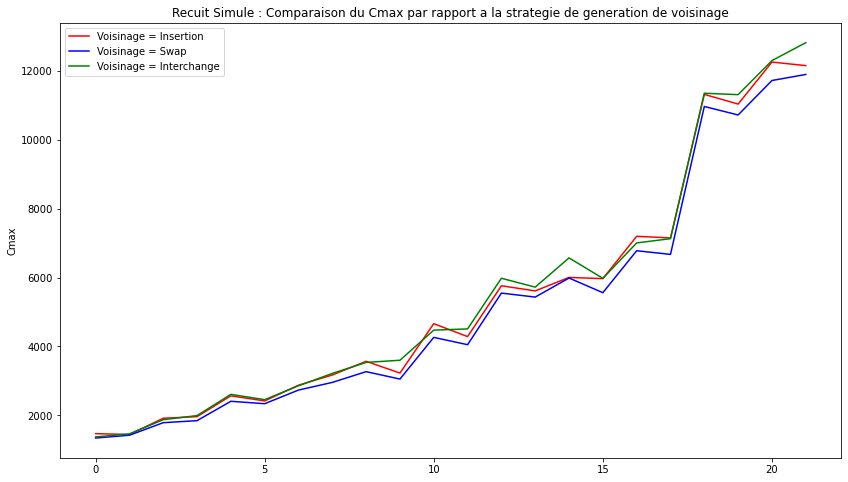

In [33]:
plt.figure(figsize=(14,8))

ypoints1 = np.array(recuit_simule_insertion_cmax)
plt.plot(ypoints1, color = 'r', label = "Voisinage = Insertion")

ypoints2 = np.array(recuit_simule_swap_cmax)
plt.plot(ypoints2, color = 'b', label = "Voisinage = Swap")

ypoints3 = np.array(recuit_simule_interchange_cmax)
plt.plot(ypoints3, color = 'g', label = "Voisinage = Interchange")

plt.legend();
plt.ylabel("Cmax");
plt.title("Recuit Simule : Comparaison du Cmax par rapport a la strategie de generation de voisinage")
plt.show()

## 1.2 La strategie de mise à jour de la temperature

In [8]:
recuit_simule_geo_cmax=[]
recuit_simule_linear_cmax=[]
recuit_simule_slow_cmax=[]

In [9]:
#On parcours les fichiers contenant les instances
files=os.listdir("./Instances_Taillard2")
i=0
for filename in files:
    
    data=np.loadtxt("./Instances_Taillard2/"+filename)
    print(filename)
    
    flowshop = fsp.FlowShop(data)
    
    #Voisinage = Insertion 
    sigma, cmax = flowshop.recuit_simule()
    recuit_simule_geo_cmax.append(int(cmax))
    
    #Voisinage = Swap 
    sigma, cmax = flowshop.recuit_simule(TempUpdate = "Linear")
    recuit_simule_linear_cmax.append(int(cmax))
    
    #Voisinage = Interchange 
    sigma, cmax = flowshop.recuit_simule(TempUpdate = "Slow")
    recuit_simule_slow_cmax.append(int(cmax))

020jobs_05machines_1.txt
020jobs_05machines_2.txt
020jobs_10machines_1.txt
020jobs_10machines_2.txt
020jobs_20machines_1.txt
020jobs_20machines_2.txt
050jobs_05machines_1.txt
050jobs_05machines_2.txt
050jobs_10machines_1.txt
050jobs_10machines_2.txt
050jobs_20machines_1.txt
050jobs_20machines_2.txt
100jobs_05machines_1.txt
100jobs_05machines_2.txt
100jobs_10machines_1.txt
100jobs_10machines_2.txt
100jobs_20machines_1.txt
100jobs_20machines_2.txt
200jobs_10machines_1.txt
200jobs_10machines_2.txt
200jobs_20machines_1.txt
200jobs_20machines_2.txt


In [11]:
print("Recuit Simule : Comparaison du Cmax par rapport a la strategie de mise à jour de la temperature")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Best Known" : [1278, 1359, 1582,1659,2297,2099,2724,2834,2991,2867,3771,3668,5493,5268,5770,5349,6106,
               6183,10862,10480,11152,11143],
    "Fonction = Geometrique" : recuit_simule_geo_cmax,
    "Fonction = Linear" : recuit_simule_linear_cmax,
    "Fonction = Slow" : recuit_simule_slow_cmax
    
})

Recuit Simule : Comparaison du Cmax par rapport a la strategie de mise à jour de la temperature


,jobs,machines,Instance,Best Known,Fonction = Geometrique,Fonction = Linear,Fonction = Slow
0,20,5,1,1278,1471,1428,1307
1,20,5,2,1359,1436,1424,1401
2,20,10,1,1582,1918,1852,1649
3,20,10,2,1659,1902,2016,1790
4,20,20,1,2297,2664,2686,2453
5,20,20,2,2099,2472,2466,2139
6,50,5,1,2724,2914,2964,2735
7,50,5,2,2834,3158,3304,2882
8,50,10,1,2991,3487,3530,3165
9,50,10,2,2867,3359,3786,3095


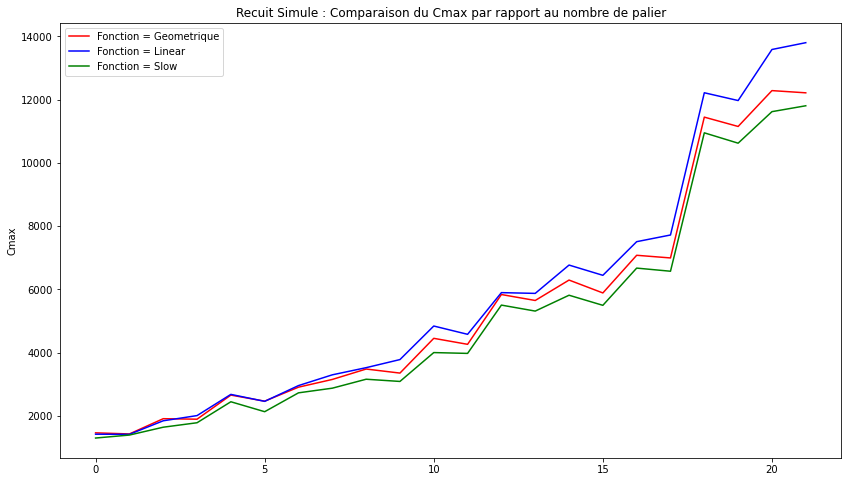

In [32]:
plt.figure(figsize=(14,8))

ypoints1 = np.array(recuit_simule_geo_cmax)
plt.plot(ypoints1, color = 'r', label = "Fonction = Geometrique")

ypoints2 = np.array(recuit_simule_linear_cmax)
plt.plot(ypoints2, color = 'b', label = "Fonction = Linear")

ypoints3 = np.array(recuit_simule_slow_cmax)
plt.plot(ypoints3, color = 'g', label = "Fonction = Slow")

plt.legend();
plt.ylabel("Cmax");
plt.title("Recuit Simule : Comparaison du Cmax par rapport au nombre de palier")
plt.show()

## 1.3 Le nombre de paliers

In [2]:
recuit_simule_palier_1_cmax=[]
recuit_simule_palier_5_cmax=[]
recuit_simule_palier_10_cmax=[]

In [3]:
#On parcours les fichiers contenant les instances
files=os.listdir("./Instances_Taillard2")
i=0
for filename in files:
    
    data=np.loadtxt("./Instances_Taillard2/"+filename)
    print(filename)
    
    flowshop = fsp.FlowShop(data)
    
    #Palier = 1
    sigma, cmax = flowshop.recuit_simule()
    recuit_simule_palier_1_cmax.append(int(cmax))
    
    #Palier = 5
    sigma, cmax = flowshop.recuit_simule(palier = 5)
    recuit_simule_palier_5_cmax.append(int(cmax))
    
    #Palier = 10
    sigma, cmax = flowshop.recuit_simule(palier = 10)
    recuit_simule_palier_10_cmax.append(int(cmax))

020jobs_05machines_1.txt
020jobs_05machines_2.txt
020jobs_10machines_1.txt
020jobs_10machines_2.txt
020jobs_20machines_1.txt
020jobs_20machines_2.txt
050jobs_05machines_1.txt
050jobs_05machines_2.txt
050jobs_10machines_1.txt
050jobs_10machines_2.txt
050jobs_20machines_1.txt
050jobs_20machines_2.txt
100jobs_05machines_1.txt
100jobs_05machines_2.txt
100jobs_10machines_1.txt
100jobs_10machines_2.txt
100jobs_20machines_1.txt
100jobs_20machines_2.txt
200jobs_10machines_1.txt
200jobs_10machines_2.txt
200jobs_20machines_1.txt
200jobs_20machines_2.txt


In [12]:
print("Recuit Simule : Comparaison du Cmax par rapport au nombre de palier")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Best Known" : [1278, 1359, 1582,1659,2297,2099,2724,2834,2991,2867,3771,3668,5493,5268,5770,5349,6106,
               6183,10862,10480,11152,11143],
    "Nb paliers = 1" : recuit_simule_palier_1_cmax,
    "Nb paliers = 5" : recuit_simule_palier_5_cmax,
    "Nb paliers = 10" : recuit_simule_palier_10_cmax
    
})

Recuit Simule : Comparaison du Cmax par rapport au nombre de palier


,jobs,machines,Instance,Best Known,Nb paliers = 1,Nb paliers = 5,Nb paliers = 10
0,20,5,1,1278,1430,1416,1392
1,20,5,2,1359,1516,1424,1437
2,20,10,1,1582,1918,1867,1894
3,20,10,2,1659,1947,1858,1883
4,20,20,1,2297,2630,2665,2602
5,20,20,2,2099,2394,2459,2272
6,50,5,1,2724,3024,2854,3034
7,50,5,2,2834,3099,3217,3244
8,50,10,1,2991,3511,3561,3629
9,50,10,2,2867,3396,3407,3398


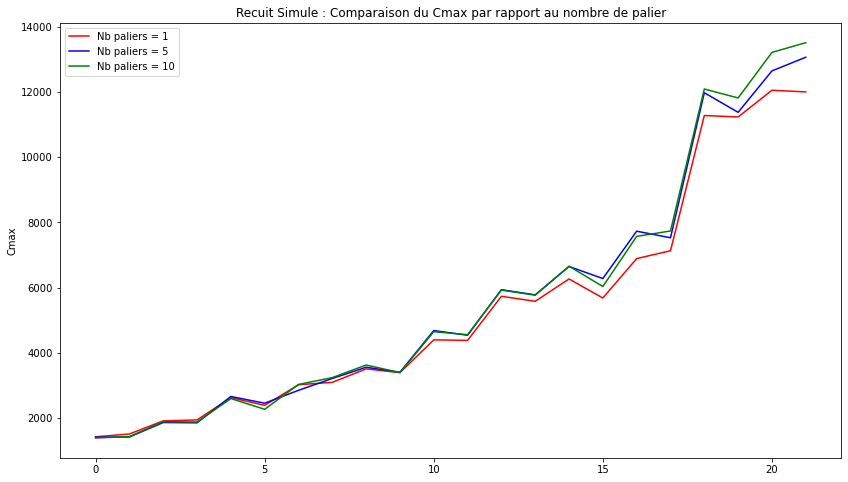

In [31]:
plt.figure(figsize=(14,8))

ypoints1 = np.array(recuit_simule_palier_1_cmax)
plt.plot(ypoints1, color = 'r', label = "Nb paliers = 1")

ypoints2 = np.array(recuit_simule_palier_5_cmax)
plt.plot(ypoints2, color = 'b', label = "Nb paliers = 5")

ypoints3 = np.array(recuit_simule_palier_10_cmax)
plt.plot(ypoints3, color = 'g', label = "Nb paliers = 10")

plt.legend();
plt.ylabel("Cmax");
plt.title("Recuit Simule : Comparaison du Cmax par rapport au nombre de palier")
plt.show()

## 1.4 Le nombre maximal de solution rejetées

In [4]:
recuit_simule_nbsolrej_Infini_cmax= recuit_simule_palier_1_cmax
recuit_simule_nbsolrej_50_cmax= []
recuit_simule_nbsolrej_10_cmax= []

In [5]:
#On parcours les fichiers contenant les instances
files=os.listdir("./Instances_Taillard2")
i=0
for filename in files:
    
    data=np.loadtxt("./Instances_Taillard2/"+filename)
    print(filename)
    
    flowshop = fsp.FlowShop(data)
    
    #nbsolrej = 50
    sigma, cmax = flowshop.recuit_simule(nbsolrej = 5)
    recuit_simule_nbsolrej_50_cmax.append(int(cmax))
    
    #nbsolrej = 10
    sigma, cmax = flowshop.recuit_simule(nbsolrej = 10)
    recuit_simule_nbsolrej_10_cmax.append(int(cmax))

020jobs_05machines_1.txt
020jobs_05machines_2.txt
020jobs_10machines_1.txt
020jobs_10machines_2.txt
020jobs_20machines_1.txt
020jobs_20machines_2.txt
050jobs_05machines_1.txt
050jobs_05machines_2.txt
050jobs_10machines_1.txt
050jobs_10machines_2.txt
050jobs_20machines_1.txt
050jobs_20machines_2.txt
100jobs_05machines_1.txt
100jobs_05machines_2.txt
100jobs_10machines_1.txt
100jobs_10machines_2.txt
100jobs_20machines_1.txt
100jobs_20machines_2.txt
200jobs_10machines_1.txt
200jobs_10machines_2.txt
200jobs_20machines_1.txt
200jobs_20machines_2.txt


In [13]:
print("Recuit Simule : Comparaison du Cmax par rapport au nombre maximal de solutions rejetees")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Best Known" : [1278, 1359, 1582,1659,2297,2099,2724,2834,2991,2867,3771,3668,5493,5268,5770,5349,6106,
               6183,10862,10480,11152,11143],
    "nbsolrej = Infini" : recuit_simule_nbsolrej_Infini_cmax,
    "nbsolrej = 50" : recuit_simule_nbsolrej_50_cmax,
    "nbsolrej = 10" : recuit_simule_nbsolrej_10_cmax
    
})

Recuit Simule : Comparaison du Cmax par rapport au nombre maximal de solutions rejetees


,jobs,machines,Instance,Best Known,nbsolrej = Infini,nbsolrej = 50,nbsolrej = 10
0,20,5,1,1278,1430,1451,1416
1,20,5,2,1359,1516,1458,1526
2,20,10,1,1582,1918,1827,1923
3,20,10,2,1659,1947,2022,2017
4,20,20,1,2297,2630,2534,2613
5,20,20,2,2099,2394,2418,2473
6,50,5,1,2724,3024,2900,3200
7,50,5,2,2834,3099,3194,3253
8,50,10,1,2991,3511,3595,3583
9,50,10,2,2867,3396,3527,3745


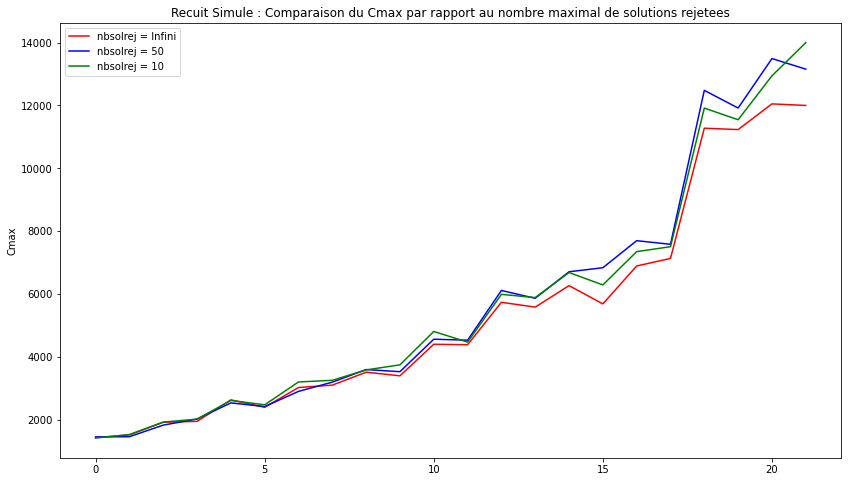

In [30]:
plt.figure(figsize=(14,8))

ypoints1 = np.array(recuit_simule_nbsolrej_Infini_cmax)
plt.plot(ypoints1, color = 'r', label = "nbsolrej = Infini")

ypoints2 = np.array(recuit_simule_nbsolrej_50_cmax)
plt.plot(ypoints2, color = 'b', label = "nbsolrej = 50")

ypoints3 = np.array(recuit_simule_nbsolrej_10_cmax)
plt.plot(ypoints3, color = 'g', label = "nbsolrej = 10")

plt.legend();
plt.ylabel("Cmax");
plt.title("Recuit Simule : Comparaison du Cmax par rapport au nombre maximal de solutions rejetees")
plt.show()

## 1.5 Variation du parametre alpha

In [35]:
recuit_simule_alpha_09_cmax= recuit_simule_palier_1_cmax
recuit_simule_alpha_05_cmax= []
recuit_simule_alpha_01_cmax= []

In [36]:
#On parcours les fichiers contenant les instances
files=os.listdir("./Instances_Taillard2")
i=0
for filename in files:
    
    data=np.loadtxt("./Instances_Taillard2/"+filename)
    print(filename)
    
    flowshop = fsp.FlowShop(data)
    
    #alpha = 0.5
    sigma, cmax = flowshop.recuit_simule(alpha = 0.5)
    recuit_simule_alpha_05_cmax.append(int(cmax))
    
    #alpha = 0.1
    sigma, cmax = flowshop.recuit_simule(alpha = 0.1)
    recuit_simule_alpha_01_cmax.append(int(cmax))

020jobs_05machines_1.txt
020jobs_05machines_2.txt
020jobs_10machines_1.txt
020jobs_10machines_2.txt
020jobs_20machines_1.txt
020jobs_20machines_2.txt
050jobs_05machines_1.txt
050jobs_05machines_2.txt
050jobs_10machines_1.txt
050jobs_10machines_2.txt
050jobs_20machines_1.txt
050jobs_20machines_2.txt
100jobs_05machines_1.txt
100jobs_05machines_2.txt
100jobs_10machines_1.txt
100jobs_10machines_2.txt
100jobs_20machines_1.txt
100jobs_20machines_2.txt
200jobs_10machines_1.txt
200jobs_10machines_2.txt
200jobs_20machines_1.txt
200jobs_20machines_2.txt


In [37]:
print("Recuit Simule : Comparaison du Cmax en variant alpha")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Best Known" : [1278, 1359, 1582,1659,2297,2099,2724,2834,2991,2867,3771,3668,5493,5268,5770,5349,6106,
               6183,10862,10480,11152,11143],
    "alpha = 0.9" : recuit_simule_alpha_09_cmax,
    "alpha = 0.5" : recuit_simule_alpha_05_cmax,
    "alpha = 0.1" : recuit_simule_alpha_01_cmax
    
})

Recuit Simule : Comparaison du Cmax en variant alpha


,jobs,machines,Instance,Best Known,alpha = 0.9,alpha = 0.5,alpha = 0.1
0,20,5,1,1278,1430,1300,1339
1,20,5,2,1359,1516,1383,1383
2,20,10,1,1582,1918,1843,1727
3,20,10,2,1659,1947,1716,1737
4,20,20,1,2297,2630,2593,2401
5,20,20,2,2099,2394,2352,2138
6,50,5,1,2724,3024,2825,2735
7,50,5,2,2834,3099,2952,2882
8,50,10,1,2991,3511,3245,3211
9,50,10,2,2867,3396,3100,3033


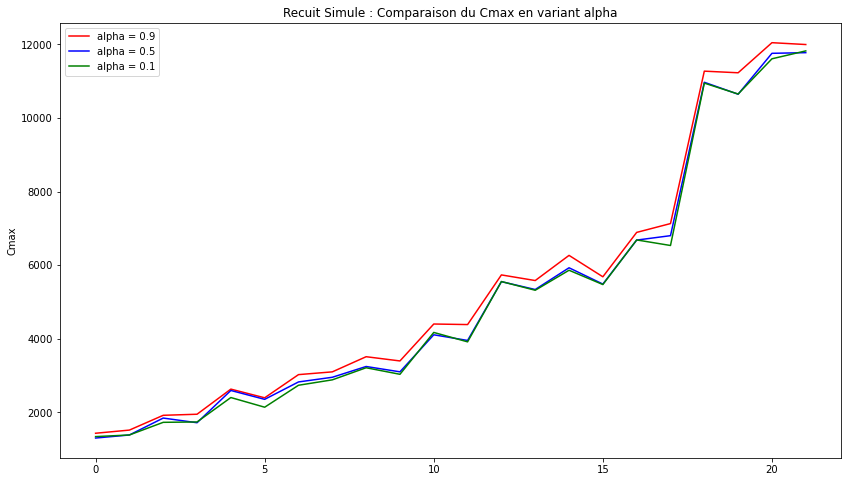

In [38]:
plt.figure(figsize=(14,8))

ypoints1 = np.array(recuit_simule_alpha_09_cmax)
plt.plot(ypoints1, color = 'r', label = "alpha = 0.9")

ypoints2 = np.array(recuit_simule_alpha_05_cmax)
plt.plot(ypoints2, color = 'b', label = "alpha = 0.5")

ypoints3 = np.array(recuit_simule_alpha_01_cmax)
plt.plot(ypoints3, color = 'g', label = "alpha = 0.1")

plt.legend();
plt.ylabel("Cmax");
plt.title("Recuit Simule : Comparaison du Cmax en variant alpha")
plt.show()

## 2.Iterative Local Search

## Etude parametrique 

## 2.1. Generation du voisinage

In [6]:
ils_insertion_cmax=[]
ils_swap_cmax=[]
ils_interchange_cmax=[]
machines=[]
jobs=[]
Instances=[]

In [8]:
#On parcours les fichiers contenant les instances
files=os.listdir("./Instances_Taillard2")
i=0
for filename in files:
    
    data=np.loadtxt("./Instances_Taillard2/"+filename)
    Instances.append((i%2)+1)
    i+=1
    print(filename)
    flowshop = fsp.FlowShop(data)
    machines.append(flowshop.M)
    jobs.append(flowshop.N)
    
    #Voisinage = Insertion 
    sigma, cmax = flowshop.ILS()
    ils_insertion_cmax.append(int(cmax))
    
    #Voisinage = Swap 
    sigma, cmax = flowshop.ILS(neibourhoodType = "Swap")
    ils_swap_cmax.append(int(cmax))
    
    #Voisinage = Interchange 
    sigma, cmax = flowshop.ILS(neibourhoodType = "Interchange")
    ils_interchange_cmax.append(int(cmax))

020jobs_05machines_1.txt
020jobs_05machines_2.txt
020jobs_10machines_1.txt
020jobs_10machines_2.txt
020jobs_20machines_1.txt
020jobs_20machines_2.txt
050jobs_05machines_1.txt
050jobs_05machines_2.txt
050jobs_10machines_1.txt
050jobs_10machines_2.txt
050jobs_20machines_1.txt
050jobs_20machines_2.txt
100jobs_05machines_1.txt
100jobs_05machines_2.txt
100jobs_10machines_1.txt
100jobs_10machines_2.txt
100jobs_20machines_1.txt
100jobs_20machines_2.txt
200jobs_10machines_1.txt
200jobs_10machines_2.txt
200jobs_20machines_1.txt
200jobs_20machines_2.txt


In [9]:
print("Iterative Local Search : Comparaison du Cmax par rapport a la strategie de generation de voisinage")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Best Known" : [1278, 1359, 1582,1659,2297,2099,2724,2834,2991,2867,3771,3668,5493,5268,5770,5349,6106,
               6183,10862,10480,11152,11143],
    "Voisinage = Insertion" : ils_insertion_cmax,
    "Voisinage = Swap" : ils_swap_cmax,
    "Voisinage = Interchange" : ils_interchange_cmax
    
})

Iterative Local Search : Comparaison du Cmax par rapport a la strategie de generation de voisinage


,jobs,machines,Instance,Best Known,Voisinage = Insertion,Voisinage = Swap,Voisinage = Interchange
0,20,5,1,1278,1297,1297,1297
1,20,5,2,1359,1383,1383,1383
2,20,10,1,1582,1642,1661,1661
3,20,10,2,1659,1712,1716,1716
4,20,20,1,2297,2386,2401,2401
5,20,20,2,2099,2125,2137,2137
6,50,5,1,2724,2735,2735,2735
7,50,5,2,2834,2882,2882,2882
8,50,10,1,2991,3133,3137,3137
9,50,10,2,2867,3025,3031,3031


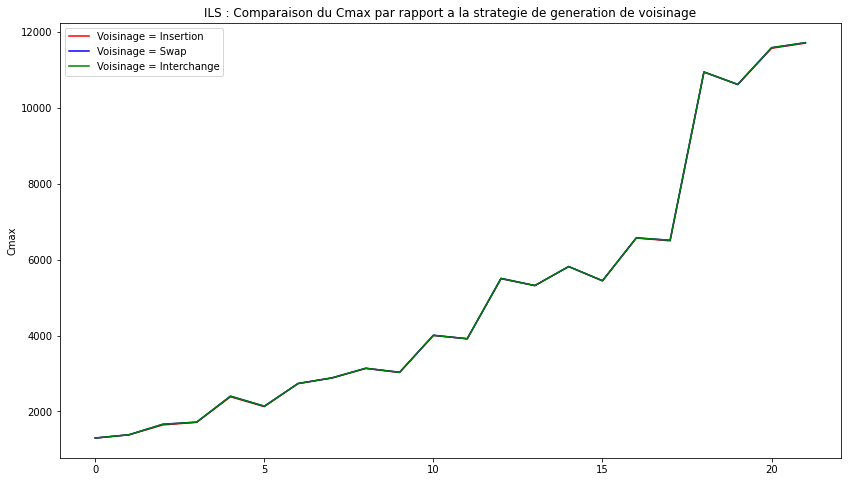

In [10]:
plt.figure(figsize=(14,8))

ypoints1 = np.array(ils_insertion_cmax)
plt.plot(ypoints1, color = 'r', label = "Voisinage = Insertion")

ypoints2 = np.array(ils_swap_cmax)
plt.plot(ypoints2, color = 'b', label = "Voisinage = Swap")

ypoints3 = np.array(ils_interchange_cmax)
plt.plot(ypoints3, color = 'g', label = "Voisinage = Interchange")

plt.legend();
plt.ylabel("Cmax");
plt.title("ILS : Comparaison du Cmax par rapport a la strategie de generation de voisinage")
plt.show()

## 2.2. Stratégie de selection dans le voisinage

In [24]:
ils_best_cmax=[]
ils_first_cmax=[]
machines=[]
jobs=[]
Instances=[]

In [25]:
#On parcours les fichiers contenant les instances
files=os.listdir("./Instances_Taillard2")
i=0
for filename in files:
    
    data=np.loadtxt("./Instances_Taillard2/"+filename)
    Instances.append((i%2)+1)
    i+=1
    print(filename)
    flowshop = fsp.FlowShop(data)
    machines.append(flowshop.M)
    jobs.append(flowshop.N)
    
    #Selection = Best
    sigma, cmax = flowshop.ILS(selectionStrategy = 'best')
    ils_best_cmax.append(int(cmax))
    
    #Selection = First
    sigma, cmax = flowshop.ILS(selectionStrategy = 'first')
    ils_first_cmax.append(int(cmax))
    

020jobs_05machines_1.txt
020jobs_05machines_2.txt
020jobs_10machines_1.txt
020jobs_10machines_2.txt
020jobs_20machines_1.txt
020jobs_20machines_2.txt
050jobs_05machines_1.txt
050jobs_05machines_2.txt
050jobs_10machines_1.txt
050jobs_10machines_2.txt
050jobs_20machines_1.txt
050jobs_20machines_2.txt
100jobs_05machines_1.txt
100jobs_05machines_2.txt
100jobs_10machines_1.txt
100jobs_10machines_2.txt
100jobs_20machines_1.txt
100jobs_20machines_2.txt
200jobs_10machines_1.txt
200jobs_10machines_2.txt
200jobs_20machines_1.txt
200jobs_20machines_2.txt


In [27]:
print("Iterative Local Search : Comparaison du Cmax par rapport a la strategie de selection dans voisinage")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Best Known" : [1278, 1359, 1582,1659,2297,2099,2724,2834,2991,2867,3771,3668,5493,5268,5770,5349,6106,
               6183,10862,10480,11152,11143],
    "Selection = best" : ils_best_cmax,
    "Selection = first" : ils_first_cmax
    
})

Iterative Local Search : Comparaison du Cmax par rapport a la strategie de selection dans voisinage


,jobs,machines,Instance,Best Known,Selection = best,Selection = first
0,20,5,1,1278,1297,1297
1,20,5,2,1359,1383,1383
2,20,10,1,1582,1642,1658
3,20,10,2,1659,1712,1712
4,20,20,1,2297,2386,2400
5,20,20,2,2099,2125,2125
6,50,5,1,2724,2735,2735
7,50,5,2,2834,2882,2882
8,50,10,1,2991,3133,3133
9,50,10,2,2867,3025,3025


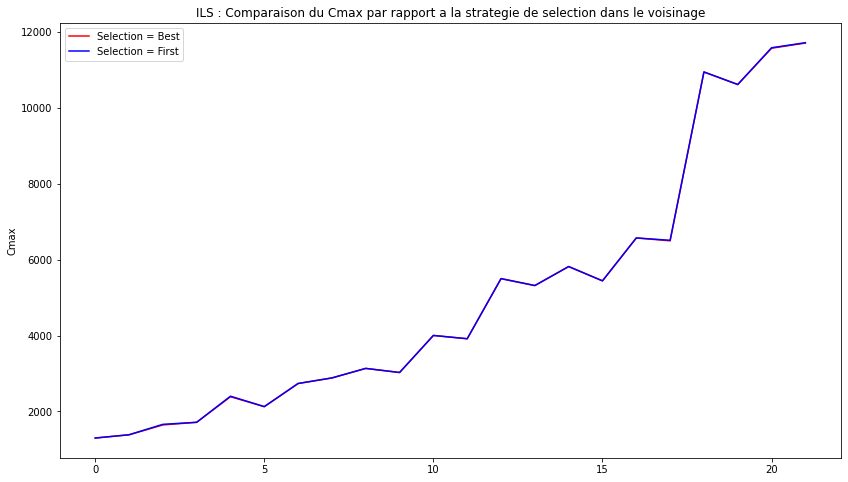

In [28]:
plt.figure(figsize=(14,8))

ypoints1 = np.array(ils_best_cmax)
plt.plot(ypoints1, color = 'r', label = "Selection = Best")

ypoints2 = np.array(ils_first_cmax)
plt.plot(ypoints2, color = 'b', label = "Selection = First")

plt.legend();
plt.ylabel("Cmax");
plt.title("ILS : Comparaison du Cmax par rapport a la strategie de selection dans le voisinage")
plt.show()

## 2.3. Stratégie de perturbation dans le voisinage

In [56]:
ils_insertion_cmax=[]
ils_swap_cmax=[]
ils_random_cmax=[]
machines=[]
jobs=[]
Instances=[]

In [57]:
#On parcours les fichiers contenant les instances
files=os.listdir("./Instances_Taillard2")
i=0
for filename in files:
    
    data=np.loadtxt("./Instances_Taillard2/"+filename)
    Instances.append((i%2)+1)
    i+=1
    print(filename)
    flowshop = fsp.FlowShop(data)
    machines.append(flowshop.M)
    jobs.append(flowshop.N)
    
    #Perturbation = Insertion
    sigma, cmax = flowshop.ILS(perturbationType = "insertion", maxCriteria = 1)
    ils_insertion_cmax.append(int(cmax))
    
    #Perturbation = Swap 
    sigma, cmax = flowshop.ILS(perturbationType = "Swap", maxCriteria = 1)
    ils_swap_cmax.append(int(cmax))
    
    #Perturbation = Random
    sigma, cmax = flowshop.ILS(perturbationType = "random", maxCriteria = 1)
    ils_random_cmax.append(int(cmax))

020jobs_05machines_1.txt
020jobs_05machines_2.txt
020jobs_10machines_1.txt
020jobs_10machines_2.txt
020jobs_20machines_1.txt
020jobs_20machines_2.txt
050jobs_05machines_1.txt
050jobs_05machines_2.txt
050jobs_10machines_1.txt
050jobs_10machines_2.txt
050jobs_20machines_1.txt
050jobs_20machines_2.txt
100jobs_05machines_1.txt
100jobs_05machines_2.txt
100jobs_10machines_1.txt
100jobs_10machines_2.txt
100jobs_20machines_1.txt
100jobs_20machines_2.txt
200jobs_10machines_1.txt
200jobs_10machines_2.txt
200jobs_20machines_1.txt
200jobs_20machines_2.txt


In [58]:
print("Iterative Local Search : Comparaison du Cmax par rapport a la strategie de perturbation")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Best Known" : [1278, 1359, 1582,1659,2297,2099,2724,2834,2991,2867,3771,3668,5493,5268,5770,5349,6106,
               6183,10862,10480,11152,11143],
    "Perturbation = Insertion" : ils_insertion_cmax,
    "Perturbation = Swap" : ils_swap_cmax,
    "Perturbation = Random" : ils_random_cmax
    
})

Iterative Local Search : Comparaison du Cmax par rapport a la strategie de perturbation


,jobs,machines,Instance,Best Known,Perturbation = Insertion,Perturbation = Swap,Perturbation = Random
0,20,5,1,1278,1297,1297,1297
1,20,5,2,1359,1383,1383,1383
2,20,10,1,1582,1642,1635,1642
3,20,10,2,1659,1712,1712,1712
4,20,20,1,2297,2386,2386,2386
5,20,20,2,2099,2125,2125,2125
6,50,5,1,2724,2735,2735,2735
7,50,5,2,2834,2882,2882,2882
8,50,10,1,2991,3133,3133,3133
9,50,10,2,2867,3025,3025,3025


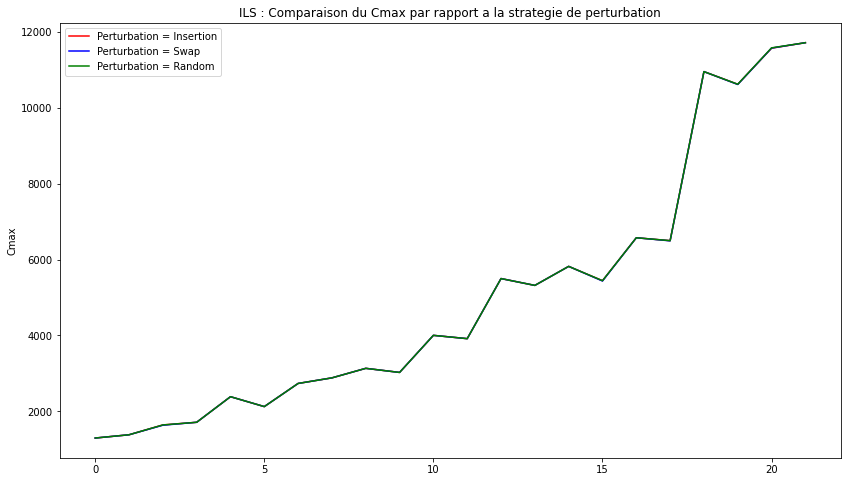

In [59]:
plt.figure(figsize=(14,8))

ypoints1 = np.array(ils_insertion_cmax)
plt.plot(ypoints1, color = 'r', label = "Perturbation = Insertion")

ypoints2 = np.array(ils_swap_cmax)
plt.plot(ypoints2, color = 'b', label = "Perturbation = Swap")

ypoints3 = np.array(ils_random_cmax)
plt.plot(ypoints3, color = 'g', label = "Perturbation = Random")

plt.legend();
plt.ylabel("Cmax");
plt.title("ILS : Comparaison du Cmax par rapport a la strategie de perturbation")
plt.show()

## 2.4. Citere d'arret - Propriété Anytime

In [60]:
ils_duration_cmax=[]
files=os.listdir("./Instances_Taillard2")

for i in range(1, 10):
    filename = "050jobs_10machines_2.txt"
    data=np.loadtxt("./Instances_Taillard2/"+filename)
    print(filename)
    
    flowshop = fsp.FlowShop(data)
    
    #Perturbation = Insertion
    sigma, cmax = flowshop.ILS(neibourhoodType='interchange', selectionStrategy = 'best', perturbationType='swap', 
                               stopCriteria = 'duration', maxCriteria = i)
    ils_duration_cmax.append(int(cmax))
    

050jobs_10machines_2.txt
050jobs_10machines_2.txt
050jobs_10machines_2.txt
050jobs_10machines_2.txt
050jobs_10machines_2.txt
050jobs_10machines_2.txt
050jobs_10machines_2.txt
050jobs_10machines_2.txt
050jobs_10machines_2.txt


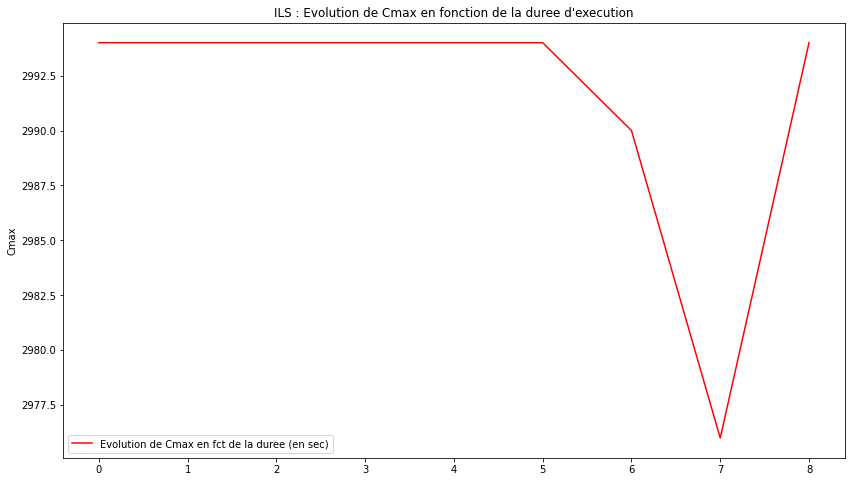

In [61]:
plt.figure(figsize=(14,8))

ypoints1 = np.array(ils_duration_cmax)
plt.plot(ypoints1, color = 'r', label = "Evolution de Cmax en fct de la duree (en sec)")

plt.legend();
plt.ylabel("Cmax");
plt.title("ILS : Evolution de Cmax en fonction de la duree d'execution")
plt.show()

## 2.5. Strategie de selection et le temps d'execution

In [5]:
ils_best_temps=[]
ils_first_temps=[]
machines=[]
jobs=[]
Instances=[]

In [6]:
#On parcours les fichiers contenant les instances
files=os.listdir("./Instances_Taillard2")
i=0
for filename in files:
    
    data=np.loadtxt("./Instances_Taillard2/"+filename)
    Instances.append((i%2)+1)
    i+=1
    print(filename)
    flowshop = fsp.FlowShop(data)
    machines.append(flowshop.M)
    jobs.append(flowshop.N)
    
    #Selection = Best
    start = timeit.default_timer()
    sigma, cmax = flowshop.ILS(neibourhoodType='swap', selectionStrategy = 'best', maxCriteria = 10)
    ils_best_temps.append(timeit.default_timer()-start)
    
    #Selection = First
    start = timeit.default_timer()
    sigma, cmax = flowshop.ILS(neibourhoodType='swap', selectionStrategy = 'first', maxCriteria = 10)
    ils_first_temps.append(timeit.default_timer()-start)
    

020jobs_05machines_1.txt
020jobs_05machines_2.txt
020jobs_10machines_1.txt
020jobs_10machines_2.txt
020jobs_20machines_1.txt
020jobs_20machines_2.txt
050jobs_05machines_1.txt
050jobs_05machines_2.txt
050jobs_10machines_1.txt
050jobs_10machines_2.txt
050jobs_20machines_1.txt
050jobs_20machines_2.txt
100jobs_05machines_1.txt
100jobs_05machines_2.txt
100jobs_10machines_1.txt
100jobs_10machines_2.txt
100jobs_20machines_1.txt
100jobs_20machines_2.txt
200jobs_10machines_1.txt
200jobs_10machines_2.txt
200jobs_20machines_1.txt
200jobs_20machines_2.txt


In [9]:
print("Iterative Local Search : Comparaison du temps par rapport a la strategie de selection dans voisinage")

pd.DataFrame({
    "jobs":jobs,
    "machines":machines,
    "Instance" : Instances,
    "Selection = best" : ils_best_temps,
    "Selection = first" : ils_first_temps
    
})

Iterative Local Search : Comparaison du temps par rapport a la strategie de selection dans voisinage


,jobs,machines,Instance,Selection = best,Selection = first
0,20,5,1,0.063776,0.047412
1,20,5,2,0.059639,0.050799
2,20,10,1,0.090543,0.059340
3,20,10,2,0.087647,0.050907
4,20,20,1,0.181930,0.097809
5,20,20,2,0.290234,0.108251
6,50,5,1,0.552627,0.510732
7,50,5,2,0.517406,0.428884
8,50,10,1,0.853142,0.611803
9,50,10,2,0.878393,0.690237


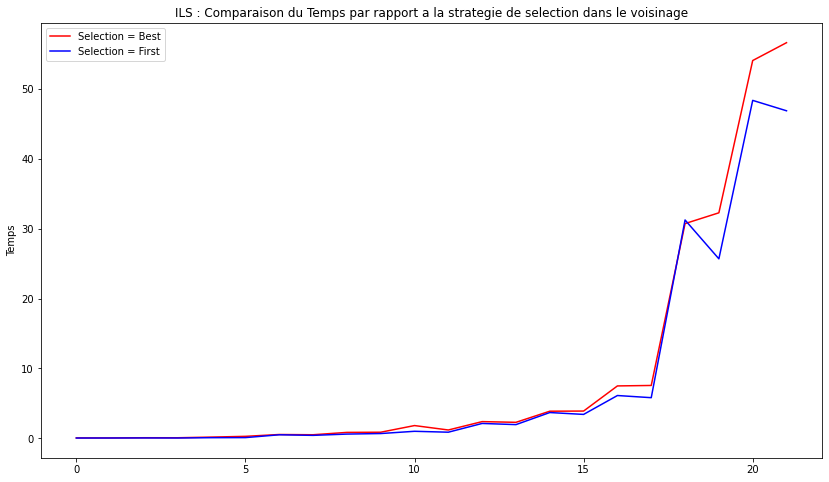

In [11]:
plt.figure(figsize=(14,8))

ypoints1 = np.array(ils_best_temps)
plt.plot(ypoints1, color = 'r', label = "Selection = Best")

ypoints2 = np.array(ils_first_temps)
plt.plot(ypoints2, color = 'b', label = "Selection = First")

plt.legend();
plt.ylabel("Temps");
plt.title("ILS : Comparaison du Temps par rapport a la strategie de selection dans le voisinage")
plt.show()